# $\beta_{33}^d$ and equilibrium selection rule

In [1174]:
using BSON
using PrettyTables
using Statistics
using DataFrames
using Plots
using KernelDensity
using Distributions

**Anomaly when estimating $\beta_{33}^d$ and the equilibrium selection rule parameter.** The estimates from several replications seem to be perfectly correlated and lie on the 45-degree line when plotted against each other. The correlation of almost equal to one is not affected by the sample size. This could be at odds with the asymptotic joint normality of the NPSML estimator. The marginal distributions resemble a normal distribution. The joint distribution is either pointing to a perfect of the two parameters and non-identification of the structural model, or it could be just a feature of the specific parameterization or distributional assumptions in the model resulting in a correlation of near one when estimating these two parameters. 

The following figure shows that **changing $\beta_{33}^d$** from $-3$ to $3$ in the true DGP does, not change the behavior of the estimator in the two dimensional parameter space case. I also experimented with various bandwidth choices and found no effect on the correlation. 

I use the  **Shapiro–Wilk** test for testing univariate normality, and the test proposed by Zhou and Shao (2014) and implemented in R for joint normality. The null hypothesis is that the sample is drawn from a normal distribution. Thus, a small p-value rejects the hypothesis of normality. 

R"library(mvnormalTest)
mhz($(est[:,1:2]))
" = RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   2.5506         0        NO 

$uv.shapiro
   W      p-value UV.Normality
V1 0.8484 0       No          
V2 0.8633 0       No          


R"library(mvnormalTest)
mhz($(est[:,1:2]))
" = RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   1.1783    0.0129        NO 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9358 1e-04   No          
V2 0.9323 1e-04   No          




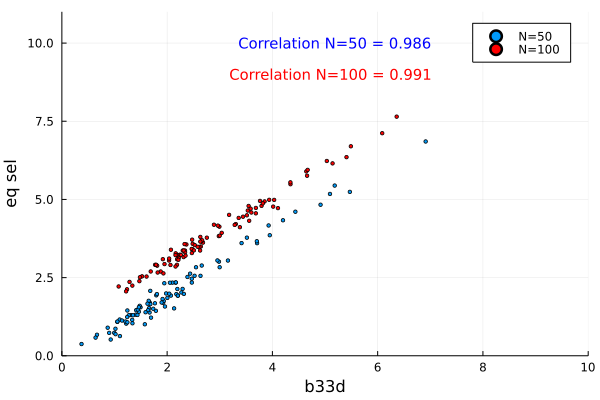

In [1179]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt1/est_50_sim_50_dmod_1_01_01_1"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])

scatter(est[:,1], est[:,2], ylims=(0,11), xlims=(0,10), markersize = 2,  label="N=50", xlabel = "b33d", ylabel ="eq sel")
cor1 = round(cor(est[:,1], est[:,2]), digits=3)
@show R"""
library(mvnormalTest)
mhz($(est[:,1:2]))
"""
path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt1/est_100_sim_50_dmod_1_01_01_1"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
scatter!(est[:,1], est[:,2].+1.,  color=:red, markersize=2,   label="N=100")
cor2 = round(cor(est[:,1], est[:,2]), digits=3)
annotate!(7, 10, text("Correlation N=50 = $(cor1)", :blue, :right, 10))
@show R"""
library(mvnormalTest)
mhz($(est[:,1:2]))
"""
annotate!(7, 9, text("Correlation N=100 = $(cor2)", :red, :right, 10))


In [1180]:
R"""
library(mvnormalTest)
mhz($(est[:,1:2]))
"""


RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   1.1783    0.0129        NO 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9358 1e-04   No          
V2 0.9323 1e-04   No          



I also considered a  different vector of true parameters and foudn no change in the correlation. Further, I verified that using partial data (only prices) does not change the outcome. 

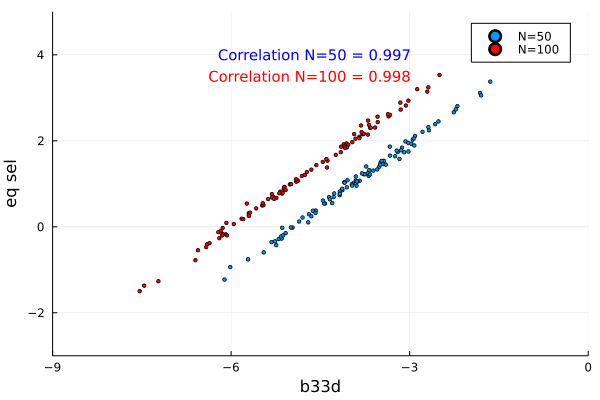

In [1181]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt7/est_100_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])

scatter(est[:,1], est[:,2], ylims=(-3,5), xlims=(-9,0), markersize = 2,  label="N=50", xlabel = "b33d", ylabel ="eq sel")
cor1 = round(cor(est[:,1], est[:,2]), digits=3)

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt7/est_200_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
scatter!(est[:,1], est[:,2].+1.,  color=:red, markersize=2,   label="N=100")
cor2 = round(cor(est[:,1], est[:,2]), digits=3)
annotate!(-3, 4, text("Correlation N=50 = $(cor1)", :blue, :right, 10))
annotate!(-3, 3.5, text("Correlation N=100 = $(cor2)", :red, :right, 10))


In [1182]:
R"""
library(mvnormalTest)
mhz($(est[:,1:2]))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   1.4929    0.0018        NO 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9806 0.1676  Yes         
V2 0.9835 0.2719  Yes         



In [1183]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT"
res = BSON.load(path)

est = reduce(vcat, res["beta_hat"])
# println(mean((est[:,1].-3).^2))
# plot(x->pdf(kde(est[:,1]), x), -10,4, color= :yellow, legends=false)
p1 = scatter(est[:,1], est[:,3],  markersize= 2)
best_est = zeros(96,3)
for i = 1:96
    best_est[i,:] = est[findmin(est[10*(i-1)+1: 10*i, 3])[2] + (i-1)*10, :]
end

I find that even in the two dimensional optimization for these specific parameters, it may be the case that we do not find the global optimum by only one run of the global optimizer. 
I run 50 instances of the global optimizer for each replication, and only pick the values from the lowest value. 

In [1184]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT_50opt"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])

path1= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT_50_2opt"
res1 = BSON.load(path1)
est1= reduce(vcat, res1["beta_hat"])

path2= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT_50_3opt"
res2 = BSON.load(path2)
est2 = reduce(vcat, res2["beta_hat"])

est = vcat(est, est1, est2)


# println(mean((est[:,1].-3).^2))
# plot(x->pdf(kde(est[:,1]), x), -10,4, color= :yellow, legends=false)

# p1 = scatter(est[:,1], est[:,3],  markersize= 2)
best_est = zeros((Int(size(est)[1]/50)),3)
for i = 1:Int(size(est)[1]/50)
    best_est[i,:] = est[findmin(est[50*(i-1)+1: 50*i, 3])[2] + (i-1)*50, :]
end

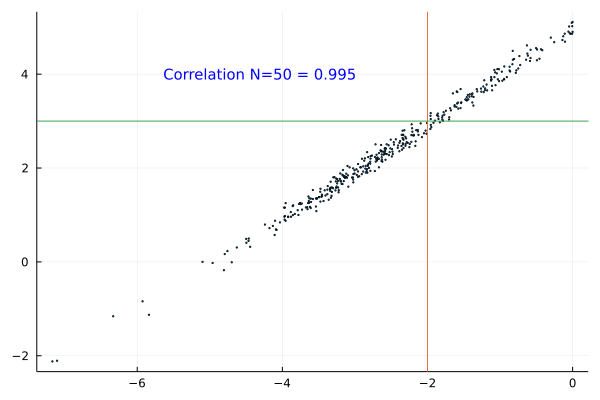

In [1185]:
scatter(best_est[:,1],best_est[:,2], markersize = 1, legends =false)
cor1 = round(cor(best_est[:,1], best_est[:,2]), digits=3)
vline!([-2])
hline!([3])
annotate!(-3, 4, text("Correlation N=50 = $(cor1)", :blue, :right, 10))


In [1186]:
sample_vec = sample(1:96*4, 100, replace = false)
R"""
library(mvnormalTest)
mhz($(best_est[sample_vec,1:2]))
"""



RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.6591    0.2919       YES 

$uv.shapiro
   W     p-value UV.Normality
V1 0.981 0.1594  Yes         
V2 0.98  0.1318  Yes         



correlation: 0.9938478372388527


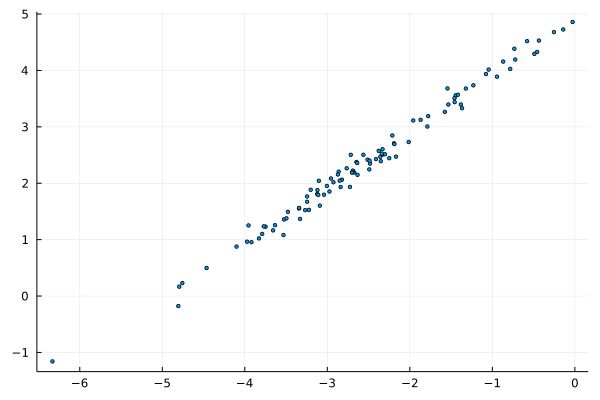

In [1187]:
println("correlation: ", cor(best_est[sample_vec,1],best_est[sample_vec,2]))
scatter(best_est[sample_vec,1],best_est[sample_vec,2], legend= false, markersize = 2 )

In [1188]:
tst = rand(MvNormal(zeros(2), [4 2*1*.99; 2*1*.99 1]), 100)'
R"""
library(mvnormalTest)
mhz($(tst))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.4194    0.7739       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9961 0.9943  Yes         
V2 0.9925 0.8543  Yes         



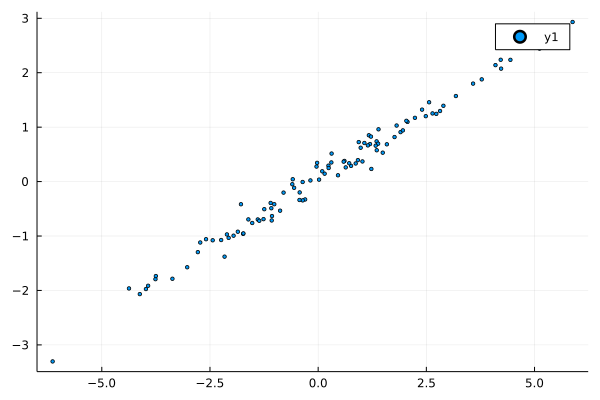

In [1190]:
scatter(tst[:,1], tst[:,2], markersize = 2)

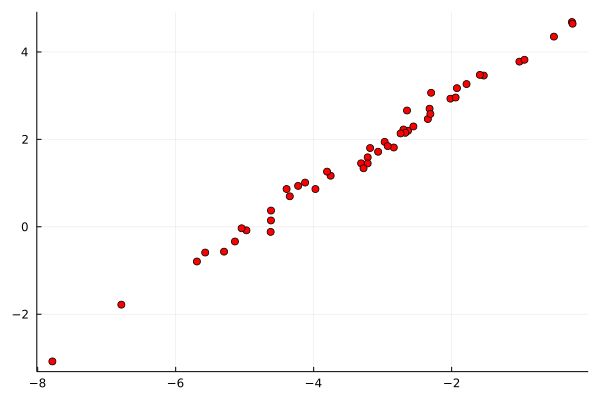

In [717]:

# path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt10/est_50_sim_500_dmod_3"
# res_200 = BSON.load(path_200)
# est_200 = reduce(vcat, res_200["beta_hat"])
# best_est_200 = zeros(24*2,3)
# for i = 1:24*2
#     best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
# end
# scatter(best_est_200[:,1], best_est_200[:,2], legends = false)
# # cor(est_200[:,1],est_200[:,2])
# cor(best_est_200[:,1],best_est_200[:,2])


## Bandwidth of price =.1
path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt12/est_50_sim_50_dmod_3"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
scatter(best_est_200[:,1], best_est_200[:,2], legends = false, color=:red)
# println(cor(best_est_200[:,1],best_est_200[:,2]))
# println(var(best_est_200[:,1]))

# # Bandwidth of price = 10*
# path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt12/est_50_sim_50_dmod_3_pr10"
# res_200 = BSON.load(path_200)
# est_200 = reduce(vcat, res_200["beta_hat"])
# best_est_200 = zeros(24*2,3)
# for i = 1:24*2
#     best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
# end

# println(cor(best_est_200[:,1],best_est_200[:,2]))
# println(var(best_est_200[:,1]))
# scatter!(best_est_200[:,1], best_est_200[:,2], legends = false, color=:yellow)

In [ ]:
# parameters 1 and 3 showing a similar pattern
path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt13/est_50_sim_50_dmod_3"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end

# Changing the variance of the unobservables
I increase the variance paramete of the unobservables. 

Correlation, large variance: 0.9589894064872097
0.23060603181071496
Correlation, larger variance: 0.914674598450547
0.13049064598555524


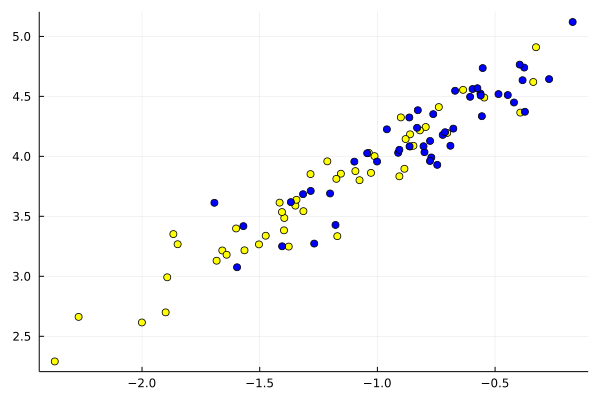

In [1131]:

## changing the variance of unobservables


# path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt12/est_50_sim_50_dmod_3"
# res_200 = BSON.load(path_200)
# est_200 = reduce(vcat, res_200["beta_hat"])
# best_est_200 = zeros(24*2,3)
# for i = 1:24*2
#     best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
# end
# scatter(best_est_200[:,1], best_est_200[:,2], legends = false, color=:red)

# println(cor(best_est_200[:,1],best_est_200[:,2]))
# println(var(best_est_200[:,1]))

path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt14/est_50_sim_50_dmod_3_both_unobs"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
println("Correlation, large variance: " ,cor(best_est_200[:,1],best_est_200[:,2]))
println(var(best_est_200[:,1]))
scatter(best_est_200[:,1], best_est_200[:,2], legends = false, color=:yellow)


path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt14/est_50_sim_50_dmod_3_large_vars"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
println("Correlation, larger variance: ", cor(best_est_200[:,1],best_est_200[:,2]))
println(var(best_est_200[:,1]))
scatter!(best_est_200[:,1], best_est_200[:,2], legends = false, color=:blue)

# path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt14/est_100_sim_50_dmod_3_larger_vars"
# res_200 = BSON.load(path_200)
# est_200 = reduce(vcat, res_200["beta_hat"])
# best_est_200 = zeros(24*2,3)
# for i = 1:24*2
#     best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
# end
# println("Correlation, largest variance: ", cor(best_est_200[:,1],best_est_200[:,2]))
# println(var(best_est_200[:,1]))
# scatter!(best_est_200[:,1], best_est_200[:,2], legends = false, color=:orange)

# vline!([-2])
# hline!([3])


In [1132]:
R"""
library(mvnormalTest)
mhz($(best_est_200[:,1:2]))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.5762    0.2953       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9593 0.0947  Yes         
V2 0.972  0.3033  Yes         



# Changing the distribution of the unobservables from Log Normal to Uniform (0,1)

Correlation, N=50: 0.7414817469412367
0.41740534150577485
[-1.252007357190669 3.1120385970976616 0.7316050589832818]
Correlation, N=100: 0.6795334591100616
0.35678980305355396
[-1.632606722051061 3.004813964048365 0.06619677434178885]


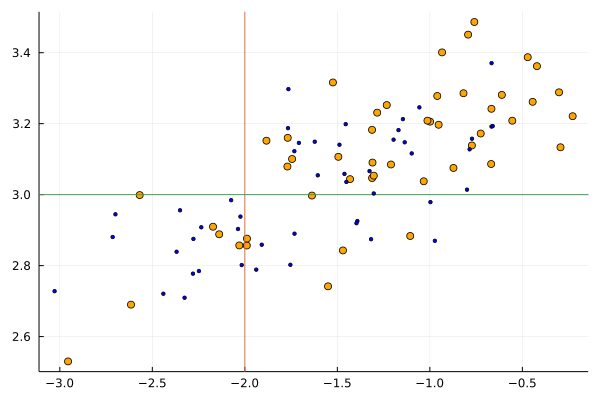

In [1172]:
### UNIFORM DISTRIBUTION FOR UNOBSERVABLES 

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-01/est_50_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est = zeros(24*2,3)
for i = 1:24*2
    best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
println("Correlation, N=50: ",cor(best_est[:,1],best_est[:,2]))
println(var(best_est[:,1]))
scatter(best_est[:,1], best_est[:,2], legends = false, color=:orange)
println(mean(best_est, dims=1))
vline!([-2])
hline!([3])

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-01/est_100_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est = zeros(24*2,3)
for i = 1:24*2
    best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end

println("Correlation, N=100: ",cor(best_est[:,1],best_est[:,2]))
println(var(best_est[:,1]))
println(mean(best_est, dims=1))

scatter!(best_est[:,1], best_est[:,2], legends = false, color=:blue, markersize = 2)



In [1173]:
R"""
library(mvnormalTest)
mhz($(best_est[:,1:2]))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.5138    0.4087       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9747 0.3808  Yes         
V2 0.9659 0.174   Yes         



# 3 parameters

0.4718502078059661
0.6398859261916062


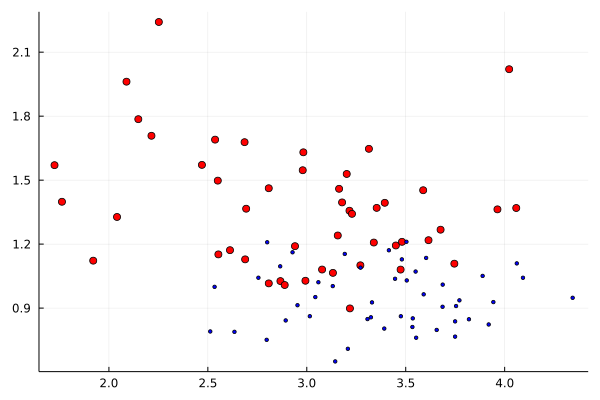

In [1139]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-02/est_50_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est =est
# zeros(24*2,4)
# for i = 1:24*2
#     best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 4])[2] + (i-1)*2, :]
# end

println(cor(best_est[:,2],best_est[:,3]))

scatter(best_est[:,1], best_est[:,4], legends = false, color=:red, markersize = 4)

                         

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-02/est_100_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est =est
# zeros(24*2,4)
# for i = 1:24*2
#     best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 4])[2] + (i-1)*2, :]
# end

println(cor(best_est[:,2],best_est[:,3]))

scatter!(best_est[:,1], best_est[:,4], legends = false, color=:blue, markersize = 2)



In [824]:
R"""
library(mvnormalTest)
mhz($(best_est[:,1:]))
"""


RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.5388    0.7892       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.985  0.7904  Yes         
V2 0.9781 0.5023  Yes         
V3 0.9697 0.2473  Yes         



In [773]:
x=rand(Normal(), 1000)
x=exp.(x)
R"""
library(mvnormalTest)
mhz($(x))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
 141.8499         0        NO 

$uv.shapiro
          W      p-value UV.Normality
statistic 0.5872 0       No          



-0.0038266938001663875
6.465448238752792
[-3.113213623509608 5.485088934745909 1.6876211950470348 -6.240477850248129 -2.48828229058754 -2.62661671164123 3.8989361980633404 2.3999682484307545 -3.1489560145191255 2.4125878789846467 1.574719310203086]
-0.22753164990812352
9.741219027761488
[-6.370395805387847 5.969564400069911 3.69599872253856 -6.622823058911561 -0.25877179009018375 -3.238799171968546 3.8875239671103725 5.79989900934267 -5.088959033654307 3.677327861704186 6.724962780552453]


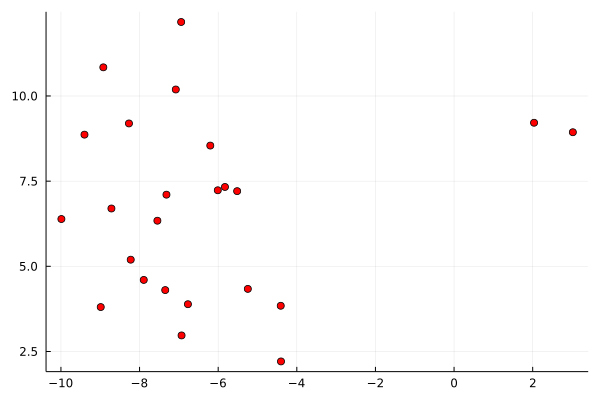

In [1143]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-03/est_50_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est =est


println(cor(best_est[:,2],best_est[:,3]))
println(var(best_est[:,1]))
println(mean(best_est, dims=1))

scatter(best_est[:,1], best_est[:,11], legends = false, color=:red, markersize = 4 )


path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-03/est_500_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est =est


println(cor(best_est[:,2],best_est[:,3]))
println(var(best_est[:,1]))
println(mean(best_est, dims=1))

scatter(best_est[:,1], best_est[:,11], legends = false, color=:red, markersize = 4 )

# true_pars =  [-1.5, 3.5, -.5, -2.5, .5, -2.5, 1.5, 4, -2, 3]
                                   

-0.0038266938001663875
6.465448238752792
[-3.113213623509608 5.485088934745909 1.6876211950470348 -6.240477850248129 -2.48828229058754 -2.62661671164123 3.8989361980633404 2.3999682484307545 -3.1489560145191255 2.4125878789846467 1.574719310203086]


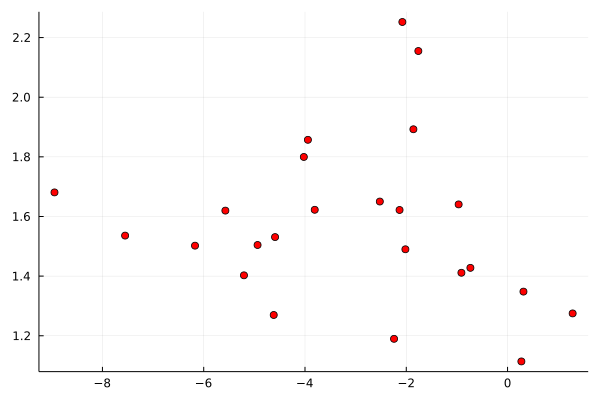

In [1142]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-03/est_50_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est =est


println(cor(best_est[:,2],best_est[:,3]))
println(var(best_est[:,1]))
println(mean(best_est, dims=1))

scatter(best_est[:,1], best_est[:,11], legends = false, color=:red, markersize = 4 )

                         

In [847]:
function res_fun(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)["beta_hat"]
    est = reduce(vcat,out)[:,1:10]
    
    fit = reduce(vcat,out)[:,11]
    if verbose==true
        for i = 1:size(est)[1]
            println("Pars: ", round.(est[i,:], digits=2), " Fitness: ", round.(fit[i], digits=2))
            sleep(0.1)
        end
    end

    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
#     m_h = mean(bw, dims=1)

    pars10 = ["b11u", "b12u", "b21u", "b22u", "b11d", "b12d", "b21d", "b13u", "b33d", "eqsel", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10);
    return est_df, bias, MSE
end



res_fun (generic function with 2 methods)

In [1148]:
true_pars =  [-1.5, 3.5, -.5, -2.5, .5, -2.5, 1.5, 4, -2, 3]


path = "/Users/amir/out/LNU/10p-01/est_100_sim_50_dmode_3.bson"
res_100, bias_100, RMSE_100 = res_fun(path, true_pars);

path = "/Users/amir/out/LNU/10p-01/est_200_sim_50_dmode_3.bson"
res_200, bias_200, RMSE_200 = res_fun(path, true_pars);

In [1149]:
println("Bias N=50, 100 ")
pretty_table(vcat(bias_100, bias_200))
println("RMSE N=50, 100 ")
pretty_table(vcat(RMSE_100, RMSE_200))

Bias N=50, 100 
┌──────────┬──────────┬───────────┬──────────┬──────────┬───────────┬──────────┬──────────┬─────────┬───────────┐
│   Col. 1 │   Col. 2 │    Col. 3 │   Col. 4 │   Col. 5 │    Col. 6 │   Col. 7 │   Col. 8 │  Col. 9 │   Col. 10 │
├──────────┼──────────┼───────────┼──────────┼──────────┼───────────┼──────────┼──────────┼─────────┼───────────┤
│ 0.833513 │ 0.700645 │ -0.213138 │ -1.09331 │ -1.65183 │ -0.380395 │  0.75243 │ -2.17666 │ 1.84387 │ -0.948816 │
│ 0.262771 │  0.69382 │ 0.0209048 │  -1.1405 │ -1.14878 │ -0.377808 │ 0.556986 │ -1.78391 │ 1.83676 │  -0.62348 │
└──────────┴──────────┴───────────┴──────────┴──────────┴───────────┴──────────┴──────────┴─────────┴───────────┘
RMSE N=50, 100 
┌──────────┬──────────┬──────────┬─────────┬─────────┬──────────┬──────────┬─────────┬─────────┬──────────┐
│   Col. 1 │   Col. 2 │   Col. 3 │  Col. 4 │  Col. 5 │   Col. 6 │   Col. 7 │  Col. 8 │  Col. 9 │  Col. 10 │
├──────────┼──────────┼──────────┼─────────┼─────────┼──────────┼───

In [1150]:
best_est_100 = zeros(100,11)
for i = 1:100
    best_est_100[i,:] = Matrix(res_100)[findmin(res_100[2*(i-1)+1: 2*i, 11])[2] + (i-1)*2, :]
end
bias_100_2 = mean(best_est_100[:,1:10], dims=1) -true_pars'
RMSE_100_2 = sqrt.(mean((best_est_100[:,1:10] .- true_pars').^2, dims=1))

best_est_200 = zeros(100,11)
for i = 1:100
    best_est_200[i,:] = Matrix(res_200)[findmin(res_200[2*(i-1)+1: 2*i, 11])[2] + (i-1)*2, :]
end
bias_200_2 = mean(best_est_200[:,1:10], dims=1) -true_pars'
RMSE_200_2 = sqrt.(mean((best_est_200[:,1:10] .- true_pars').^2, dims=1))
pretty_table(vcat(bias_100, bias_100_2, bias_200, bias_200_2))
pretty_table(vcat(RMSE_100, RMSE_100_2, RMSE_200, RMSE_200_2))


┌──────────┬──────────┬───────────┬──────────┬──────────┬───────────┬──────────┬──────────┬─────────┬───────────┐
│   Col. 1 │   Col. 2 │    Col. 3 │   Col. 4 │   Col. 5 │    Col. 6 │   Col. 7 │   Col. 8 │  Col. 9 │   Col. 10 │
├──────────┼──────────┼───────────┼──────────┼──────────┼───────────┼──────────┼──────────┼─────────┼───────────┤
│ 0.833513 │ 0.700645 │ -0.213138 │ -1.09331 │ -1.65183 │ -0.380395 │  0.75243 │ -2.17666 │ 1.84387 │ -0.948816 │
│ 0.858152 │ 0.704271 │  -0.23052 │  -1.0925 │ -1.65162 │ -0.377991 │ 0.748606 │ -2.18181 │ 1.86738 │ -0.946459 │
│ 0.262771 │  0.69382 │ 0.0209048 │  -1.1405 │ -1.14878 │ -0.377808 │ 0.556986 │ -1.78391 │ 1.83676 │  -0.62348 │
│ 0.251675 │ 0.692494 │ 0.0217522 │  -1.1397 │  -1.1419 │ -0.387218 │ 0.550564 │ -1.79393 │ 1.85013 │ -0.632954 │
└──────────┴──────────┴───────────┴──────────┴──────────┴───────────┴──────────┴──────────┴─────────┴───────────┘
┌──────────┬──────────┬──────────┬─────────┬─────────┬──────────┬──────────┬─────────┬──

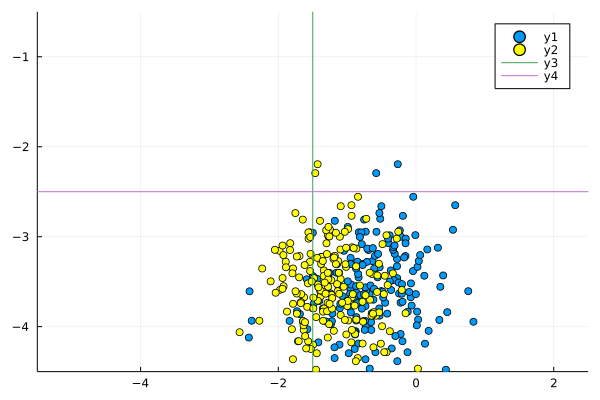

In [1162]:
d1 = 1; d2 = 4; limx = [(true_pars[d1]-4,true_pars[d1]+4)]; limy= [(true_pars[d2]-2,true_pars[d2]+2)];
scatter(res_100[:,d1], res_200[:,d2], xlims=limx[1], ylims=limy[1])
scatter!(res_200[:,d1], res_200[:,d2], color=:yellow)

vline!([true_pars[d1]])
hline!([true_pars[d2]])
# println("Correlation, N=100: ", cor(res_100[:,d1],res_100[d2]))
# println("Correlation, N=200: ", cor(res_200[:,d1],res_200[d2]))

In [1170]:
R"""
library(mvnormalTest)
mhz($(res_200[:,[1,5,6]]))
"""


RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.7114    0.6459       YES 

$uv.shapiro
     W      p-value UV.Normality
b11u 0.9947 0.7066  Yes         
b11d 0.9944 0.6618  Yes         
b12d 0.9952 0.7819  Yes         



In [855]:
true_pars =  [-1.5, 3.5, -.5, -2.5, .5, -2.5, 1.5, 4, -2, 3]

pretty_table(res_50)

┌─────────────┬─────────┬────────────┬──────────┬───────────┬──────────┬─────────┬──────────┬──────────────┬─────────┬──────────┐
│        b11u │    b12u │       b21u │     b22u │      b11d │     b12d │    b21d │     b13u │         b33d │   eqsel │    llike │
│     Float64 │ Float64 │    Float64 │  Float64 │   Float64 │  Float64 │ Float64 │  Float64 │      Float64 │ Float64 │  Float64 │
├─────────────┼─────────┼────────────┼──────────┼───────────┼──────────┼─────────┼──────────┼──────────────┼─────────┼──────────┤
│   -0.504747 │ 4.59138 │  -0.670254 │ -4.48406 │  -1.23094 │ -3.11718 │ 2.47495 │  1.70137 │    -0.598645 │ 1.81915 │  1.05323 │
│   -0.275248 │  4.6192 │  -0.721519 │ -4.61933 │  -1.60794 │ -2.83055 │ 2.74413 │  1.82382 │    -0.251435 │ 2.09686 │  1.04934 │
│  -0.0771916 │  4.5732 │  -0.940097 │ -4.17258 │  -1.63886 │ -2.92116 │  2.6009 │  1.49796 │   -0.0578826 │ 1.77847 │ 0.397828 │
│  -0.0742611 │ 4.60888 │  -0.939517 │ -4.22489 │  -1.64965 │ -2.91792 │ 2.61194 │  1.4795